In [1]:
import tensorflow as tf

# Display the version
print(tf.__version__)	

# other imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.9.1


In [2]:
df_cd_temp = pd.read_csv('cifar10_new2.csv')
# df_cd_temp = pd.read_csv('cifar10_merged.csv')

# normal model

In [3]:
myacc = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_norm_new'+ str(myround) + '.h5')
        myacc[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


13/13 [==============================] - 1s 25ms/step - loss: 1.7276 - accuracy: 0.7579


13/13 [==============================] - 1s 23ms/step - loss: 1.9764 - accuracy: 0.6934


In [4]:
myacc

array([[0.7873832 , 0.77450979, 0.78371501, 0.75063616, 0.69312167],
       [0.79512197, 0.81510419, 0.80402011, 0.76059848, 0.7027027 ],
       [0.76499999, 0.75735295, 0.77835053, 0.79790026, 0.70921987],
       [0.77272725, 0.74807197, 0.73838633, 0.7791878 , 0.73589742],
       [0.81585675, 0.7955665 , 0.77937651, 0.80927837, 0.6507538 ],
       [0.82742316, 0.78337532, 0.80710661, 0.76543212, 0.73753279],
       [0.79672897, 0.7595908 , 0.77435899, 0.7263158 , 0.70316303],
       [0.80051816, 0.79353231, 0.79134858, 0.73945409, 0.67788464],
       [0.82245433, 0.80684596, 0.7330097 , 0.78717947, 0.7044335 ],
       [0.7647059 , 0.79036146, 0.76633167, 0.73880595, 0.67904508],
       [0.81190479, 0.77506113, 0.78406167, 0.78880405, 0.76349616],
       [0.80310881, 0.78163773, 0.79058826, 0.74371856, 0.73195875],
       [0.80094784, 0.79197997, 0.81136954, 0.74867725, 0.72463769],
       [0.84900987, 0.78571427, 0.82205516, 0.78085643, 0.69607842],
       [0.80676329, 0.77806789, 0.

In [5]:
nn = 0
meanPerBin = np.zeros(5)
for myturn in range (5):
    meanPerBin[myturn] = np.mean(myacc[:, myturn])
    nn += (np.mean(myacc[:, myturn]))
print(nn/5)
meanPerBin

0.7687658220529556


array([0.80189584, 0.78587562, 0.78021117, 0.7642778 , 0.71156868])

In [6]:
myhist = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhist[myround-1,mydiff] = len(df_test_temp)
myhist

array([[428., 408., 393., 393., 378.],
       [410., 384., 398., 401., 407.],
       [400., 408., 388., 381., 423.],
       [418., 389., 409., 394., 390.],
       [391., 406., 417., 388., 398.],
       [423., 397., 394., 405., 381.],
       [428., 391., 390., 380., 411.],
       [386., 402., 393., 403., 416.],
       [383., 409., 412., 390., 406.],
       [408., 415., 398., 402., 377.],
       [420., 409., 389., 393., 389.],
       [386., 403., 425., 398., 388.],
       [422., 399., 387., 378., 414.],
       [404., 392., 399., 397., 408.],
       [414., 383., 410., 417., 376.],
       [380., 414., 414., 389., 403.],
       [385., 411., 400., 347., 457.],
       [399., 422., 420., 383., 376.],
       [389., 401., 409., 395., 406.],
       [389., 406., 389., 405., 411.]])

In [7]:
myhistAccum = np.zeros (5)
for histindex in range (5):
    myhistAccum[histindex] = np.sum(myhist[:, histindex])
print(myhistAccum)

[8063. 8049. 8034. 7839. 8015.]


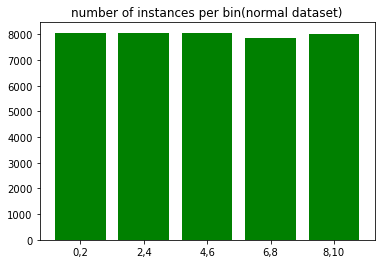

In [8]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum, color='green')
plt.title("number of instances per bin(normal dataset)")
plt.show()

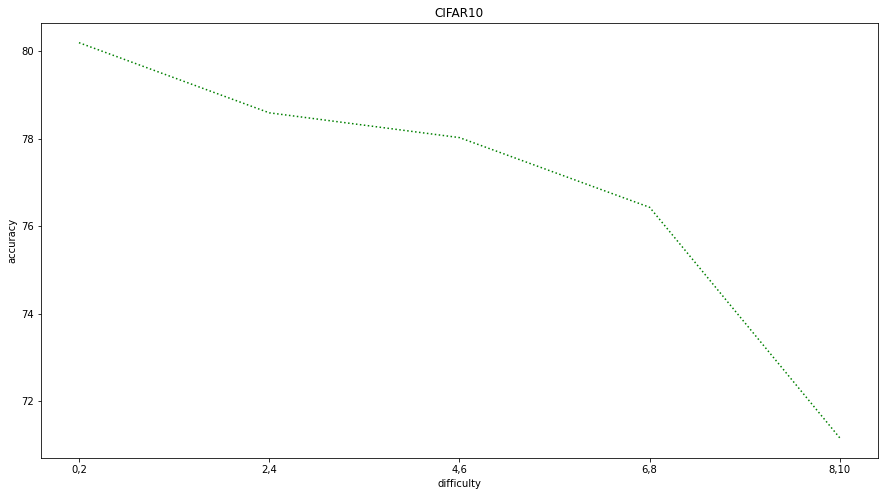

In [47]:
plt.title("CIFAR10")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
#plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [15]:
#meanPerBin = [0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944]
#meanPerBin = np.array(meanPerBin)

# contaminated model

In [11]:
myaccCont = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_contam_new'+ str(myround) + '.h5')
        myaccCont[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


19/19 [==============================] - 1s 25ms/step - loss: 1.2971 - accuracy: 0.7723


27/27 [==============================] - 1s 24ms/step - loss: 2.0194 - accuracy: 0.7088


In [12]:
myaccCont

array([[0.79523808, 0.78095239, 0.75401068, 0.78130513, 0.72276032],
       [0.76119405, 0.83068782, 0.79245281, 0.74813432, 0.70301622],
       [0.80530971, 0.78894472, 0.82105261, 0.78938055, 0.73048782],
       [0.74752474, 0.75661373, 0.81730771, 0.7385965 , 0.70878458],
       [0.79144382, 0.83769631, 0.77130044, 0.79130435, 0.74150485],
       [0.81777775, 0.78365386, 0.80829018, 0.73741007, 0.71393645],
       [0.7703349 , 0.76649743, 0.72307694, 0.75      , 0.71886122],
       [0.81592041, 0.81      , 0.79365081, 0.7631579 , 0.73452383],
       [0.8216216 , 0.77619046, 0.76410258, 0.74520069, 0.73118281],
       [0.79081631, 0.84579438, 0.79802954, 0.781982  , 0.75      ],
       [0.83486241, 0.79807693, 0.73372781, 0.74187726, 0.73443007],
       [0.77884614, 0.78756475, 0.76442307, 0.76164877, 0.71308523],
       [0.78672987, 0.76683939, 0.76842105, 0.73943663, 0.72434366],
       [0.82758623, 0.81313133, 0.75510204, 0.73840445, 0.72685188],
       [0.81775701, 0.8202247 , 0.

In [13]:
nnCont = 0
meanPerBinCont = np.zeros(5)
for myturn in range (5):
    meanPerBinCont[myturn] = np.mean(myaccCont[:, myturn])
    nnCont += (np.mean(myaccCont[:, myturn]))
print(nnCont/5)
meanPerBinCont

0.7709687978029252


array([0.80127468, 0.79449393, 0.77534426, 0.75923099, 0.72450012])

In [14]:
myhistCont = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont[myround-1,mydiff] = len(df_test_temp)
myhistCont

array([[210., 210., 187., 567., 826.],
       [201., 189., 212., 536., 862.],
       [226., 199., 190., 565., 820.],
       [202., 189., 208., 570., 831.],
       [187., 191., 223., 575., 824.],
       [225., 208., 193., 556., 818.],
       [209., 197., 195., 556., 843.],
       [201., 200., 189., 570., 840.],
       [185., 210., 195., 573., 837.],
       [196., 214., 203., 555., 832.],
       [218., 208., 169., 554., 851.],
       [208., 193., 208., 558., 833.],
       [211., 193., 190., 568., 838.],
       [203., 198., 196., 539., 864.],
       [214., 178., 203., 548., 857.],
       [198., 217., 196., 540., 849.],
       [189., 218., 172., 542., 879.],
       [206., 197., 221., 548., 828.],
       [195., 185., 205., 584., 831.],
       [199., 202., 184., 577., 838.]])

In [15]:
myhistAccumCont = np.zeros (5)
for histindex in range (5):
    myhistAccumCont[histindex] = np.sum(myhistCont[:, histindex])
print(myhistAccumCont)

[ 4083.  3996.  3939. 11181. 16801.]


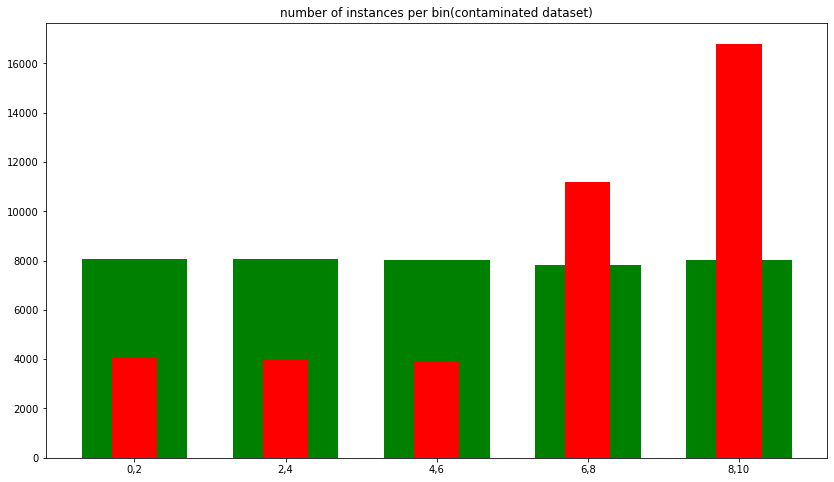

In [16]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.7, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.3, color = 'red')

plt.title("number of instances per bin(contaminated dataset)")
plt.show()

In [17]:
# meanPerBinNew = [0.71428572, 0.72000001, 0.60714287, 0.62500002, 0.8309091 ,
#        0.82231537, 0.81719316, 0.78188153, 0.76519568, 0.71659919,
#        0.69835466, 0.6452514 ]
# type(meanPerBinContNew)
# meanPerBinNew = np.array(meanPerBinNew)

In [18]:
# meanPerBinContNew = np.zeros (5)
# meanPerBinContNew = [0.80118111, 0.8146718,  0.85048545, 0.82841328, 0.84199584, 0.79749479, 0.8180602,  0.78814017, 0.76028922, 0.70718231]
# meanPerBinContNew = np.array(meanPerBinContNew)


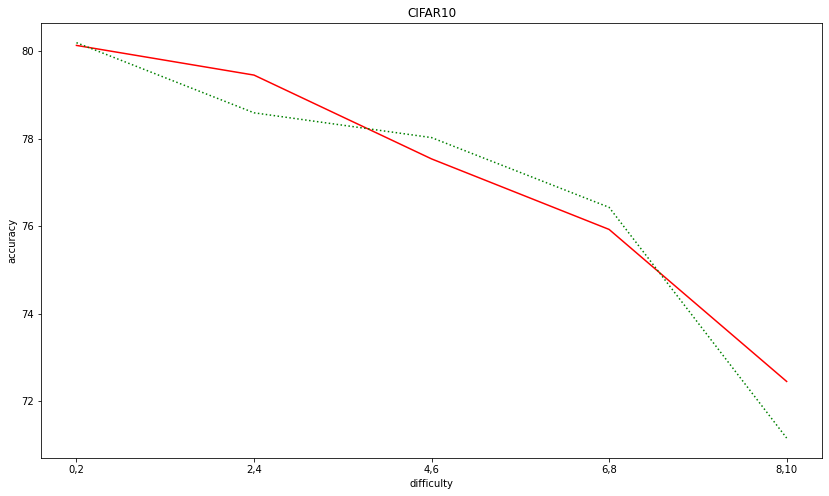

In [48]:
plt.title("CIFAR10")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
# plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [151]:
# acc_new_cont = myaccCont*myhistCont

In [20]:
# acc_new_12Cont = np.zeros (12)
# for histindex in range (12):
#     acc_new_12Cont[histindex] = np.sum(acc_new_cont[:, histindex])
# print(acc_new_12Cont)
# print(acc_new_12Cont/myhistAccumCont)
# meanPerBinContNew = acc_new_12Cont/myhistAccumCont
# print(np.mean(acc_new_12Cont/myhistAccumCont))

# Contaminate model on normal data

In [21]:
myaccCont_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_contam_new'+ str(myround) + '.h5')
        myaccCont_nor[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


13/13 [==============================] - 1s 25ms/step - loss: 1.3870 - accuracy: 0.7604


13/13 [==============================] - 0s 25ms/step - loss: 1.8382 - accuracy: 0.7251


In [22]:
nnCont_nor = 0
meanPerBinCont_nor = np.zeros(5)
for myturn in range (5):

    meanPerBinCont_nor[myturn] = np.mean(myaccCont_nor[:, myturn])
    nnCont_nor += (np.mean(myaccCont_nor[:, myturn]))
print(nnCont_nor/5)
print(meanPerBinCont_nor)

0.7696856564283371
[0.80726987 0.78789353 0.77495269 0.76124081 0.71707137]


In [23]:
myhistCont_nor = np.zeros((5,10))

for myroundCont_nor in range(1,6):
    df_cd = df_cd_temp.sample(frac=1, random_state=myroundCont_nor)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont_nor[myroundCont_nor-1,mydiff] = len(df_test_temp)
myhistCont_nor

array([[428., 408., 393., 393., 378.,   0.,   0.,   0.,   0.,   0.],
       [410., 384., 398., 401., 407.,   0.,   0.,   0.,   0.,   0.],
       [400., 408., 388., 381., 423.,   0.,   0.,   0.,   0.,   0.],
       [418., 389., 409., 394., 390.,   0.,   0.,   0.,   0.,   0.],
       [391., 406., 417., 388., 398.,   0.,   0.,   0.,   0.,   0.]])

In [24]:
myhistAccumCont_nor = np.zeros (5)
for histindex in range (5):
    myhistAccumCont_nor[histindex] = np.sum(myhistCont_nor[:, histindex])
print(myhistAccumCont_nor)

[2047. 1995. 2005. 1957. 1996.]


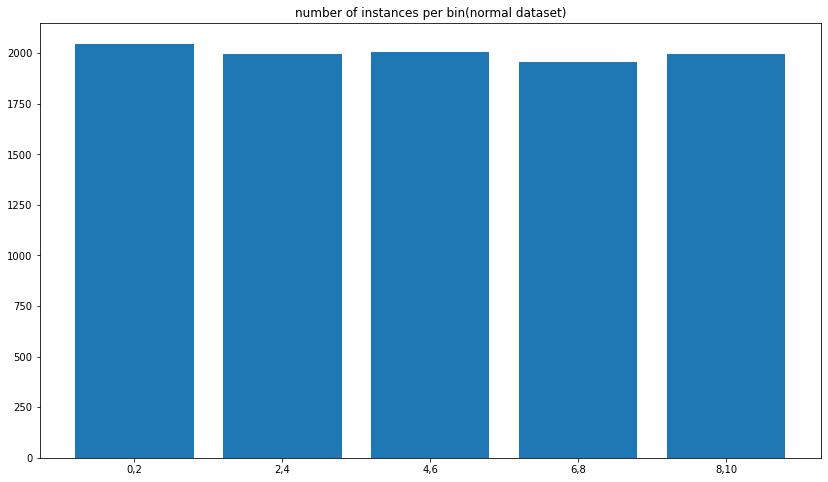

In [25]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont_nor)
plt.title("number of instances per bin(normal dataset)")
plt.show()

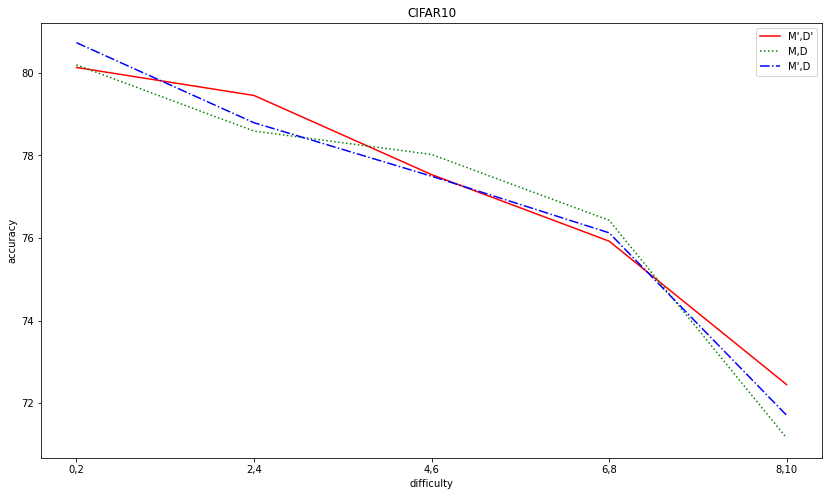

In [49]:
plt.title("CIFAR10")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
# plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.legend(["M',D'","M,D", "M',D"])
plt.show()

# Balanced dataset

In [28]:
myaccBal = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('balanced'+ str(myround) + '.h5')
        myaccBal[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


17/17 [==============================] - 1s 28ms/step - loss: 1.5118 - accuracy: 0.7597


27/27 [==============================] - 1s 29ms/step - loss: 1.7419 - accuracy: 0.7286


In [29]:
nnBal = 0
meanPerBinBal = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal[:, myturn])))
    meanPerBinBal[myturn] = np.mean(myaccBal[:, myturn])
    nnBal += (np.mean(myaccBal[:, myturn]))
nnBal/5

0.7986186027526856
0.7960240840911865
0.7721689462661743
0.7701986312866211
0.7233911246061325


0.77208027780056

In [30]:
myhistBal = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistBal[myround-1,mydiff] = len(df_test_temp)
myhistBal

array([[210., 210., 187., 556., 837.],
       [201., 189., 212., 548., 850.],
       [226., 199., 190., 551., 834.],
       [202., 189., 208., 566., 835.],
       [187., 191., 223., 568., 831.],
       [225., 208., 193., 560., 814.],
       [209., 197., 195., 564., 835.],
       [201., 200., 189., 575., 835.],
       [185., 210., 195., 570., 840.],
       [196., 214., 203., 552., 835.],
       [218., 208., 169., 568., 837.],
       [208., 193., 208., 531., 860.],
       [211., 193., 190., 550., 856.],
       [203., 198., 196., 553., 850.],
       [214., 178., 203., 559., 846.],
       [198., 217., 196., 552., 837.],
       [189., 218., 172., 519., 902.],
       [206., 197., 221., 553., 823.],
       [195., 185., 205., 541., 874.],
       [199., 202., 184., 575., 840.]])

In [31]:
myhistAccumBal = np.zeros (5)
for histindex in range (5):
    myhistAccumBal[histindex] = np.sum(myhistBal[:, histindex])
print(myhistAccumBal)

[ 4083.  3996.  3939. 11111. 16871.]


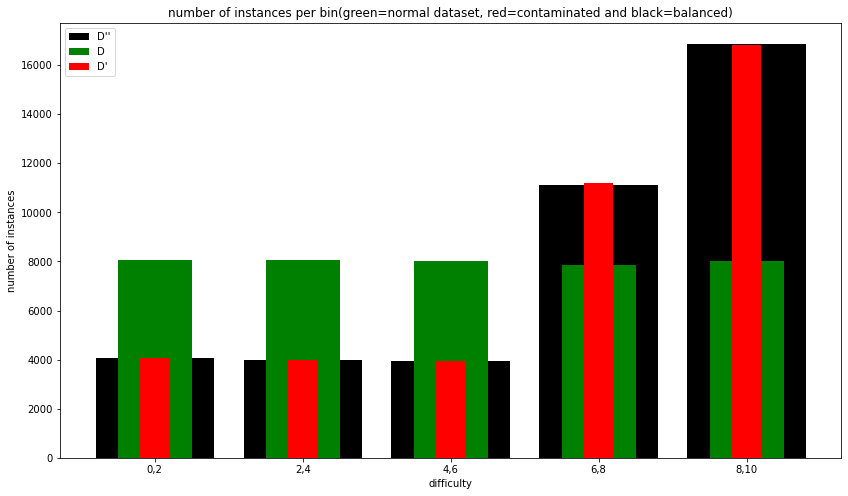

In [32]:
plt.xlabel("difficulty")
plt.ylabel("number of instances")
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumBal,width=0.8, color='black')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.5, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.2, color = 'red')
plt.title("number of instances per bin(green=normal dataset, red=contaminated and black=balanced)")
plt.legend(["D''","D", "D'"])
plt.show()

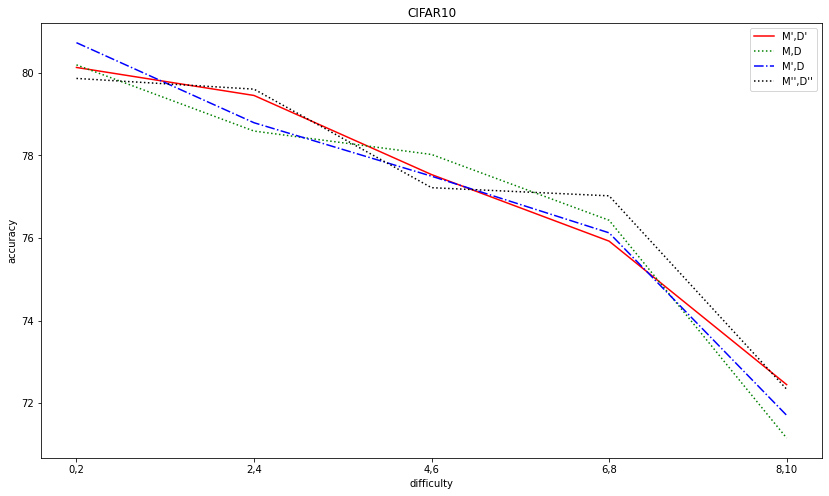

In [50]:
plt.title("CIFAR10")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
# plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.legend(["M',D'","M,D", "M',D","M'',D''"])
plt.show()

# M'' on D

In [34]:
myaccBal_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('balanced'+ str(myround) + '.h5')
        myaccBal_nor[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


13/13 [==============================] - 1s 29ms/step - loss: 1.3822 - accuracy: 0.7311


13/13 [==============================] - 1s 36ms/step - loss: 1.8273 - accuracy: 0.7056


In [35]:
nnBal_nor = 0
meanPerBinBal_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal_nor[:, myturn])))
    meanPerBinBal_nor[myturn] = np.mean(myaccBal_nor[:, myturn])
    nnBal_nor += (np.mean(myaccBal_nor[:, myturn]))
print(nnBal_nor/5)
meanPerBinBal_nor

0.8019682109355927
0.7916768103837967
0.7716888338327408
0.7610104411840439
0.7191648304462432
0.7691018253564834


array([0.80196821, 0.79167681, 0.77168883, 0.76101044, 0.71916483])

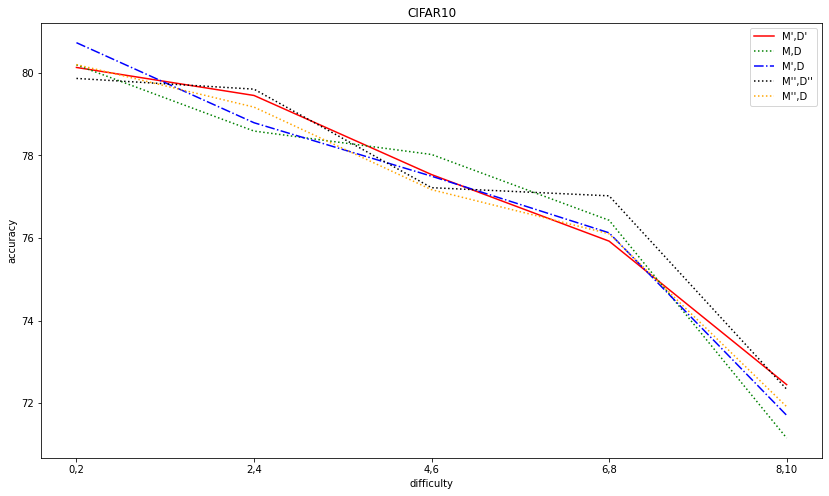

In [51]:
plt.title("CIFAR10")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
# plt.ylim([0, 100])
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

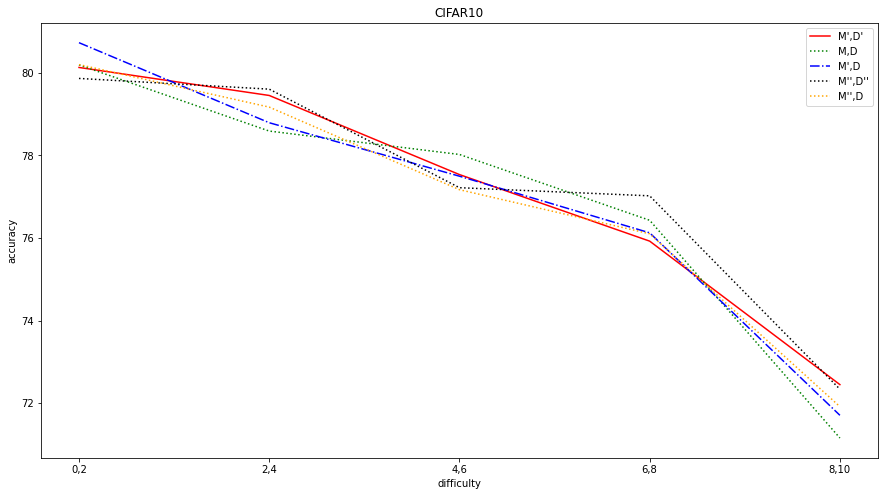

In [53]:
plt.title("CIFAR10")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
# plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

# EasyOut 


In [38]:
myaccEasyOut = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_easyout = df_cd .iloc[:22000,:]
    df_easyout = df_easyout.sort_values('Dffclt', ascending=True)
    df_easyout = df_easyout.iloc[6000:,:]
    df_easyout = df_easyout.sample(frac=1, random_state=myround)
    df_cd1 =  df_easyout#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = df_cd1.iloc[10000:11000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (1,5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('easyOut'+ str(myround) + '.h5')
        myaccEasyOut[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


29/29 [==============================] - 1s 30ms/step - loss: 1.7799 - accuracy: 0.7117


In [39]:
myaccEasyOut = myaccCont

In [40]:
nnEasyout = 0
meanPerBinEasyout = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasyOut[:, myturn])))
    meanPerBinEasyout[myturn] = np.mean(myaccEasyOut[:, myturn])
    nnEasyout += (np.mean(myaccEasyOut[:, myturn]))
nnEasyout/5

0.8012746840715408
0.7944939315319062
0.7753442645072937
0.7592309892177582
0.7245001196861267


0.7709687978029252

In [41]:
meanPerBinEasyout

array([0.80127468, 0.79449393, 0.77534426, 0.75923099, 0.72450012])

# Easyout on Normal

In [42]:
myaccEasy_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[22000:24000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('easyOut'+ str(myround) + '.h5')
        myaccEasy_nor[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


13/13 [==============================] - 1s 30ms/step - loss: 1.4113 - accuracy: 0.7737


13/13 [==============================] - 1s 28ms/step - loss: 1.7167 - accuracy: 0.6980


In [43]:
nnEasy_nor = 0
meanPerBinEasy_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasy_nor[:, myturn])))
    
    meanPerBinEasy_nor[myturn] = np.mean(myaccEasy_nor[:, myturn])
    nnEasy_nor += (np.mean(myaccEasy_nor[:, myturn]))
print(nnEasy_nor/5)
meanPerBinEasy_nor

0.8090438187122345
0.7892595946788787
0.7813013345003128
0.7650135159492493
0.7188133955001831
0.7726863318681717


array([0.80904382, 0.78925959, 0.78130133, 0.76501352, 0.7188134 ])

# retrieve Data

In [44]:
# meanPerBin = np.array([0.81568544, 0.82140847, 0.80552403, 0.77806241, 0.7098649 ])
# meanPerBinCont = np.array([0.80767933, 0.82463289, 0.80939752, 0.77914783, 0.71715362])
# meanPerBinCont_nor = np.array([0.81199346, 0.8217077,  0.80910676, 0.77614851, 0.71247184])
# meanPerBinBal = np.array([0.81236317, 0.82065215, 0.80579921, 0.78426849, 0.71543938])
# meanPerBinBal_nor = np.array([0.81236317, 0.82065215, 0.80579921, 0.78426849, 0.71543938])
# meanPerBinEasyout = np.array([0.80767933, 0.82463289, 0.80939752, 0.77914783, 0.71715362])
# meanPerBinEasy_nor = np.array([0.80561813, 0.82470758, 0.80038515, 0.78395973, 0.72265057])

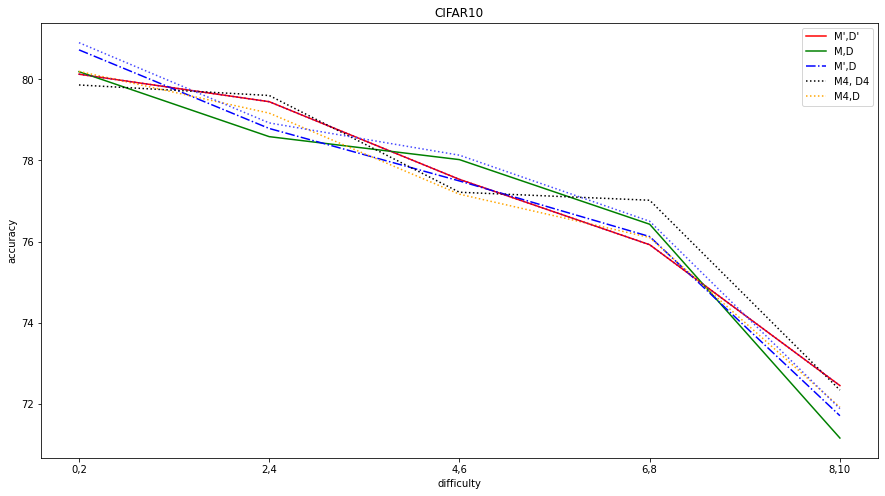

In [54]:
plt.title("CIFAR10")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
# plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


#plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D", "M4, D4", "M4,D"])
plt.legend(["M',D'","M,D", "M',D","M4, D4", "M4,D"])
plt.show()

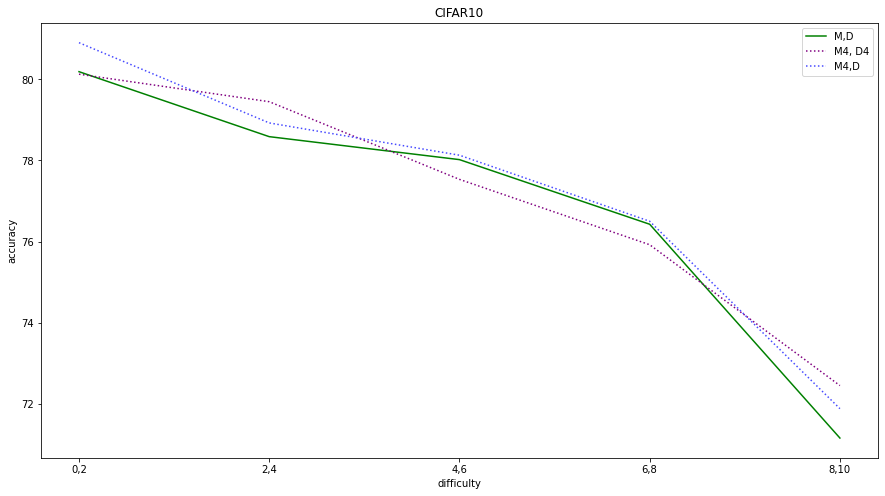

In [55]:
plt.title("CIFAR10")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
# plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


plt.legend(["M,D", "M4, D4", "M4,D"])
plt.show()

In [96]:
# print(myhistAccum)
# print(meanPerBin)
addition = 0
for ttt in range (12):
    addition += (myhistAccumCont[ttt] * meanPerBinCont[ttt])
print(addition/10000)

0.7735473649561405


In [104]:
# print(myhistAccum)
# print(meanPerBin)
addition = 0
for ttt in range (12):
    addition += (myhistAccumBal[ttt] * meanPerBinBal[ttt])
print(addition/10000)

0.7807967591792345


In [123]:
print(myhistAccumCont*meanPerBinCont)

[  15.4000001     9.8000001     6.33333337   17.06166664  239.32292824
 1313.43389761  781.8941541  1515.1754302  1691.76763027 1028.91033478
  678.10812228  432.61471226]


In [108]:
myhistAccumCont

array([  20.,    5.,   15.,   40.,  345., 1550.,  975., 1950., 2130.,
       1290., 1080.,  600.])

In [124]:
print(sum(myhistAccumCont))
print(sum(myhistAccum))

10000.0
10000.0


In [106]:
meanPerBinCont

array([0.77      , 0.81666667, 0.63333334, 0.58833333, 0.84268637,
       0.8365821 , 0.83091834, 0.79914316, 0.77108825, 0.73076018,
       0.68703964, 0.66658661])

In [109]:
myhistAccum

array([  35.,   25.,   28.,   48.,  550., 3101., 1931., 1435., 1201.,
        741.,  547.,  358.])

In [107]:
meanPerBin

array([0.72619048, 0.76095239, 0.58285715, 0.61619049, 0.83195212,
       0.82245232, 0.81758156, 0.78117882, 0.76437445, 0.71728251,
       0.69882983, 0.65006368])

In [215]:
df_cd_temp


,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
0,26,17,13,13,13,14,14,15,14,10,...,144,33,29,46,28,27,26,27,-0.850018,8
1,94,101,95,94,94,97,111,142,166,154,...,147,150,152,163,174,182,184,155,2.216391,5
2,183,158,166,167,169,171,163,163,160,161,...,177,227,250,250,250,250,250,250,-0.684760,0
3,255,254,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,3.926303,6
4,182,156,156,144,118,132,148,118,136,85,...,83,75,79,72,68,73,67,75,1.266376,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54046,76,76,77,76,75,76,76,76,76,78,...,177,223,239,239,235,236,234,236,3.352000,8
54047,81,91,98,106,108,110,80,84,88,90,...,143,155,156,160,173,129,147,160,3.503452,3
54048,20,19,15,15,14,13,12,11,10,9,...,68,50,52,52,51,50,53,47,1.109084,5
54049,25,15,23,17,23,51,74,91,114,137,...,83,84,79,78,78,80,81,80,3.416564,1


In [3]:
newDiff = np.arange  (54051)
newDiff

array([    0,     1,     2, ..., 54048, 54049, 54050])

In [4]:
newDiff2 = newDiff*10/54050
newDiff2

array([0.00000000e+00, 1.85013876e-04, 3.70027752e-04, ...,
       9.99962997e+00, 9.99981499e+00, 1.00000000e+01])

In [5]:
df_with_newdiff = df_cd_temp.sort_values('Dffclt', ascending=True)
df_with_newdiff

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
34419,252,251,251,251,250,249,250,247,238,218,...,251,250,250,251,251,251,251,251,-5.976701,9
16402,89,87,92,92,89,91,93,92,99,99,...,54,49,44,46,37,34,40,39,-5.976701,3
52436,108,105,144,146,136,124,126,116,134,186,...,102,97,118,132,126,138,155,123,-5.976701,2
4643,104,100,102,96,92,96,88,85,81,86,...,3,4,6,10,21,29,58,136,-5.964522,1
22660,184,165,178,172,164,185,189,178,183,189,...,188,188,185,184,186,186,168,171,-5.964522,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53487,146,179,156,177,178,107,85,79,67,71,...,137,129,123,130,113,120,128,105,5.997048,5
35470,198,249,255,255,255,255,255,255,255,255,...,52,56,63,57,56,63,70,65,5.997048,9
50266,157,151,149,147,145,145,140,137,133,134,...,48,52,58,69,66,73,78,77,5.997194,2
32249,129,163,167,142,125,89,88,104,104,109,...,125,126,123,132,132,132,127,116,5.997194,6


In [6]:
for myturn in range (54051):
    df_with_newdiff.iloc[myturn,3072] = newDiff2[myturn]

In [241]:
newDiff2[100]

0.018501387604070305

In [248]:
df_with_newdiff

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
34419,252,251,251,251,250,249,250,247,238,218,...,251,250,250,251,251,251,251,251,0.000000,9
16402,89,87,92,92,89,91,93,92,99,99,...,54,49,44,46,37,34,40,39,0.000185,3
52436,108,105,144,146,136,124,126,116,134,186,...,102,97,118,132,126,138,155,123,0.000370,2
4643,104,100,102,96,92,96,88,85,81,86,...,3,4,6,10,21,29,58,136,0.000555,1
22660,184,165,178,172,164,185,189,178,183,189,...,188,188,185,184,186,186,168,171,0.000740,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53487,146,179,156,177,178,107,85,79,67,71,...,137,129,123,130,113,120,128,105,9.999260,5
35470,198,249,255,255,255,255,255,255,255,255,...,52,56,63,57,56,63,70,65,9.999445,9
50266,157,151,149,147,145,145,140,137,133,134,...,48,52,58,69,66,73,78,77,9.999630,2
32249,129,163,167,142,125,89,88,104,104,109,...,125,126,123,132,132,132,127,116,9.999815,6


In [7]:
df_with_newdiff = df_with_newdiff.sort_index()
df_with_newdiff

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
0,26,17,13,13,13,14,14,15,14,10,...,144,33,29,46,28,27,26,27,1.105828,8
1,94,101,95,94,94,97,111,142,166,154,...,147,150,152,163,174,182,184,155,7.431267,5
2,183,158,166,167,169,171,163,163,160,161,...,177,227,250,250,250,250,250,250,1.594450,0
3,255,254,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,9.052174,6
4,182,156,156,144,118,132,148,118,136,85,...,83,75,79,72,68,73,67,75,6.050139,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54046,76,76,77,76,75,76,76,76,76,78,...,177,223,239,239,235,236,234,236,8.629417,8
54047,81,91,98,106,108,110,80,84,88,90,...,143,155,156,160,173,129,147,160,8.756522,3
54048,20,19,15,15,14,13,12,11,10,9,...,68,50,52,52,51,50,53,47,5.814986,5
54049,25,15,23,17,23,51,74,91,114,137,...,83,84,79,78,78,80,81,80,8.683996,1


In [253]:
# df_with_newdiff.to_csv('CIFAR_merged_newdiff.csv') 

In [56]:
import random
 
random.seed(3)
 
# print a random number between 1 and 1000.
print(random.randint(1, 1000))
 
# if you want to get the same random number again then,
random.seed(3)
print(random.randint(1, 1000))
 
# If seed function is not used
 
# Gives totally unpredictable responses.
print(random.randint(1, 1000))

244
244
607


In [16]:
!pip install pyreadr

In [17]:
import pyreadr

result = pyreadr.read_r('results_CIFAR10_156x60000.Rds') # also works for RData

# done! 
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
df = result[None] # extract the pandas data frame 
df

,learner,0,1,2,3,4,5,6,7,8,...,59991,59992,59993,59994,59995,59996,59997,59998,59999,acc
0,mlr.classif.rpart(47),0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224883
1,sklearn.pipeline.Pipeline(imputation=hyperimp....,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.462400
2,keras.wrappers.scikit_learn.KerasClassifier(2),0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.407117
3,sklearn.pipeline.Pipeline(imputation=sklearn.p...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286450
4,sklearn.pipeline.Pipeline(imputation=sklearn.p...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,keras.engine.sequential.Sequential.54cdbc1b(2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.100000
152,keras.engine.sequential.Sequential.54cdbc1b(2),0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.100000
153,keras.engine.sequential.Sequential.54cdbc1b(2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.100000
154,keras.engine.sequential.Sequential.54cdbc1b(2),0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100000


In [23]:
df.iloc[2,0]
nparr = np.array(df)

In [32]:
nparr[155,0]


'tensorflow.python.keras.engine.sequential.Sequential.5d790f77(1)'

In [25]:
np.sum(nparr[:,2])

128.0

In [36]:
sumcorrect =  np.zeros((60000))
for my_index in range (60000):
    sumcorrect[my_index] = np.sum(nparr[:,(my_index+1)])
sumcorrect

array([ 22., 128.,   2., ...,  93.,  26.,  98.])

<function matplotlib.pyplot.show(close=None, block=None)>

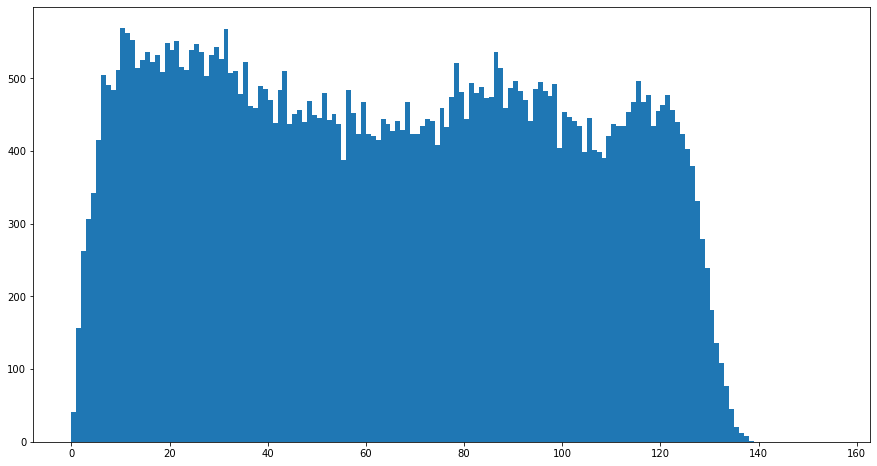

In [53]:
plt.hist(sumcorrect,bins=np.arange(156))
plt.show

In [43]:
(np.unique(sumcorrect)).shape

(139,)

In [51]:
np.count_nonzero(sumcorrect>100)

12819

In [52]:
sumcorrect.shape


(60000,)